<a href="https://colab.research.google.com/github/paras9o9/Diabetes-Prediction/blob/main/notebooks/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.info()
df.describe()
df['Outcome'].value_counts()

cols_with_zero_issues = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zero_issues] == 0).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [26]:
for col in cols_with_zero_issues:
  df[col] = df[col].replace(0, np.nan)
  df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-26-2675127078.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [27]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.metrics import f1_score

k_values = range(1, 21)
accuracy_scores = []
f1_scores = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred_k = knn.predict(X_test)

  acc = accuracy_score(y_test, y_pred_k)
  f1 = f1_score(y_test, y_pred_k)

  accuracy_scores.append(acc)
  f1_scores.append(f1)

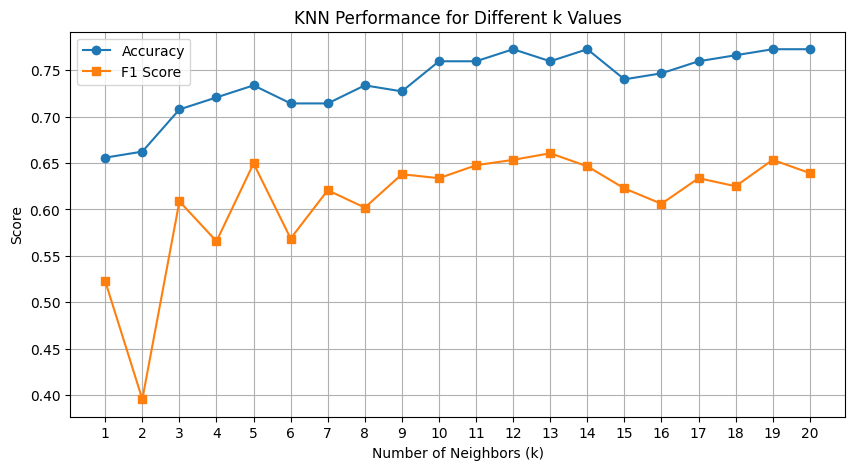

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Performance for Different k Values')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


In [30]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [31]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7727272727272727
[[86 13]
 [22 33]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=13))
])

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

knn_cv_acc = cross_val_score(knn_pipeline, x_scaled, y, cv=skf, scoring='accuracy')
knn_cv_f1 = cross_val_score(knn_pipeline, x_scaled, y, cv=skf, scoring='f1')

print(f"KNN CV Accuracy: {knn_cv_acc.mean():.4f}")
print(f"KNN CV F1 Score: {knn_cv_f1.mean():.4f}")

KNN CV Accuracy: 0.7694
KNN CV F1 Score: 0.6472


In [33]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, gamma='scale'))
])

svm_cv_acc = cross_val_score(svm_pipeline, x_scaled, y, cv=skf, scoring='accuracy')
svm_cv_f1 = cross_val_score(svm_pipeline, x_scaled, y, cv=skf, scoring='f1')

print(f"SVM CV Accuracy: {svm_cv_acc.mean():.4f}")
print(f"SVM CV F1 Score: {svm_cv_f1.mean():.4f}")

SVM CV Accuracy: 0.7474
SVM CV F1 Score: 0.5971


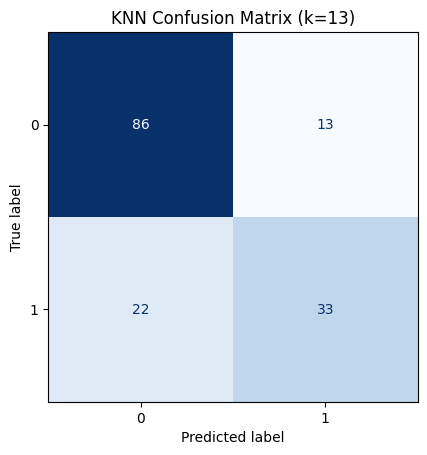

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

final_knn = KNeighborsClassifier(n_neighbors=12)
final_knn.fit(X_train, y_train)
y_pred_knn = final_knn.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap="Blues", colorbar=False)
plt.title("KNN Confusion Matrix (k=13)")
plt.show()

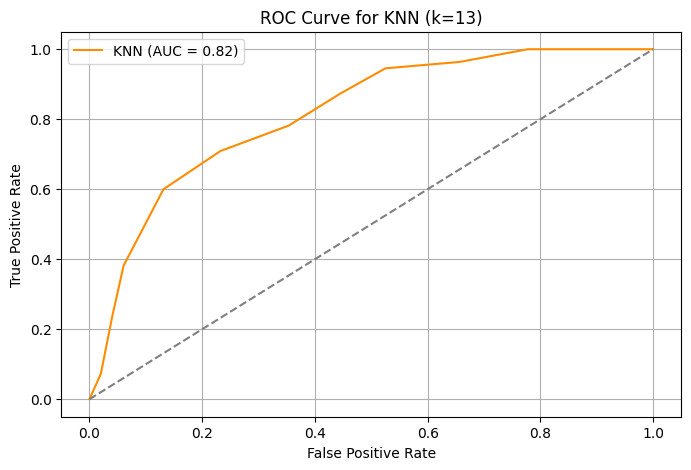

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = final_knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN (k=13)")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_test, y_pred_knn, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.round(2)

,precision,recall,f1-score,support
0,0.80,0.87,0.83,99.00
1,0.72,0.60,0.65,55.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.76,0.73,0.74,154.00
weighted avg,0.77,0.77,0.77,154.00


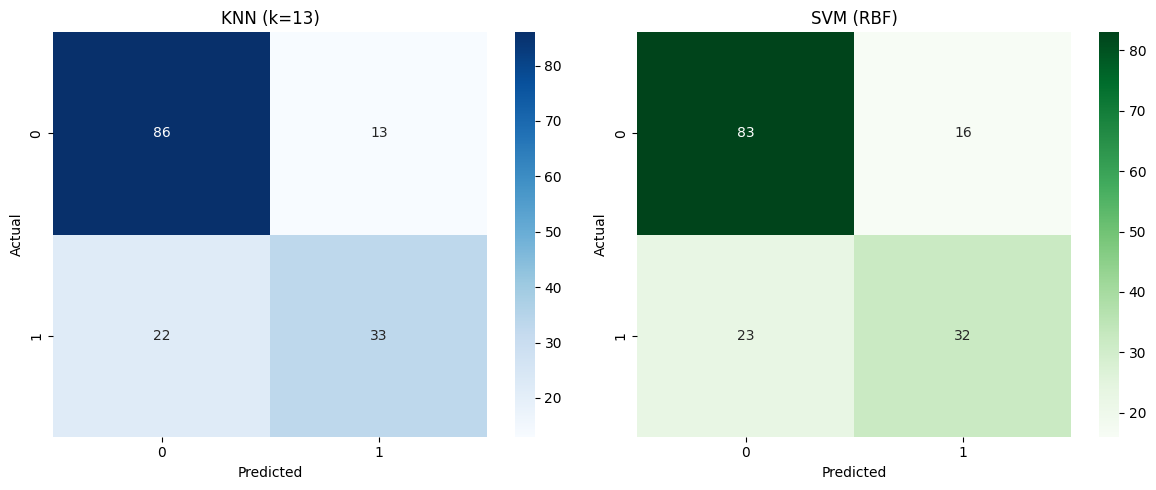

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = SVC(kernel='rbf', C=1, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('KNN (k=13)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('SVM (RBF)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

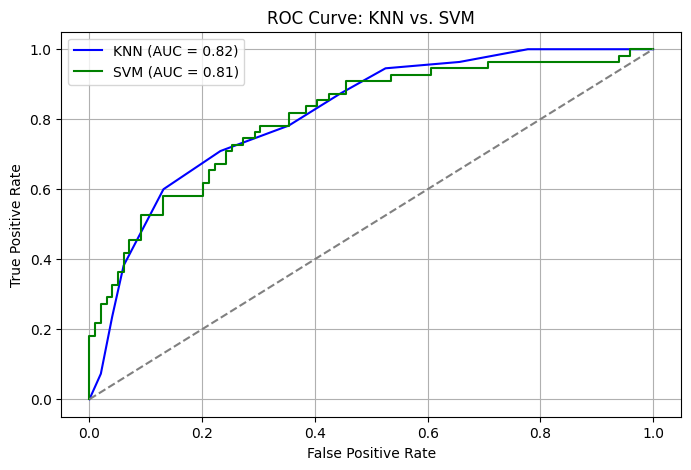

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba_knn = final_knn.predict_proba(X_test)[:, 1]
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

auc_knn = roc_auc_score(y_test, y_proba_knn)
auc_svm = roc_auc_score(y_test, y_proba_svm)

plt.figure(figsize=(8, 5))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: KNN vs. SVM')
plt.legend()
plt.grid(True)
plt.show()

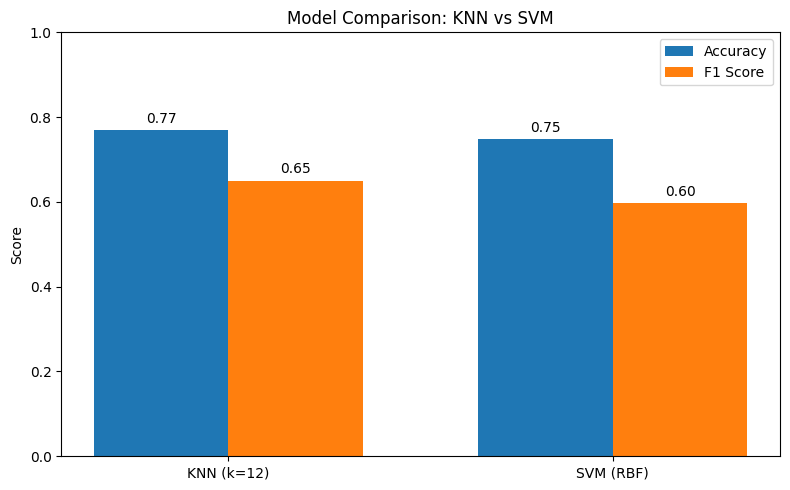

In [39]:
import numpy as np

accuracy_scores = [0.77, 0.7474]
f1_scores = [0.65, 0.5971]

labels = ['KNN (k=12)', 'SVM (RBF)']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

ax.set_ylabel('Score')
ax.set_title('Model Comparison: KNN vs SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [57]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Recreate x to ensure it's a 2D DataFrame
x = df.drop('Outcome', axis=1)

# Fit scaler on full data
scaler = StandardScaler()
x_scaled_full = scaler.fit_transform(x)

# Train model
model = KNeighborsClassifier(n_neighbors=13)
model.fit(x_scaled_full, y)

# Save both
with open('knn_model.pkl', 'wb') as f:
    pickle.dump((scaler, model), f)

In [58]:
from google.colab import files
files.download('knn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00
